In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time 
%matplotlib inline
from imutils.video import count_frames
from scipy.spatial import distance as dist

In [19]:
#%matplotlib notebook

 # Video i/p 

In [20]:
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/Export_2019-12-18_181852/0 - 2019-12-18 17-56-37-496.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/New Slab/Export_2019-12-19_124059/0 - 2019-12-19 07-01-00-394.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/day-4 data/0 - 2019-12-19 19-35-05-273.mov")

cap = cv2.VideoCapture("C:/Users/shrin/Documents/Abhilash/tata steel/data from tata - 5/0 - 2020-01-08 15-48-40-033.mov")
#cap = cv2.VideoCapture("C:/Users/shrin/Downloads/VID-20200106-WA0003.mp4")

#cap = cv2.VideoCapture("C:/Users/shrin/Desktop/openpose-master/openpose-master/build/examples/tutorial_api_python/abhilash.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

700.0

In [21]:
cap.set(cv2.CAP_PROP_POS_FRAMES,0)

True

In [22]:
#%matplotlib notebook

(1080, 1920, 3)
(1080, 1920, 3)


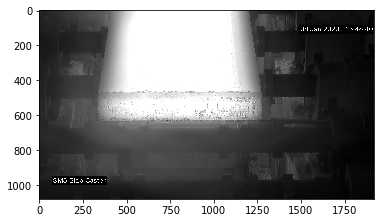

In [23]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
#frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
#resized = cv2.resize(frame,(frame.shape[1]*2,frame.shape[0]*2), interpolation=cv2.INTER_LINEAR)
#print(frame.shape)
#frame = cv2.resize(frame,(frame.shape[1]*2,frame.shape[0]*2), cv2.INTER_AREA)
print(frame.shape)
plt.imshow(frame)

In [24]:
#cv2.imwrite("toTatat1.jpg",frame)

In [25]:
#%matplotlib notebook

# pixels Per Metric

In [26]:
#alar = [682,708,1095,685]
#alar = [510-9,800,1126-9,800]
#alar = [308,651,1203,651]
alar = [257,647,1390,647]
#alar = [510,1351,2784,1351] #2x

In [27]:
#drawLine = frame.copy()

dB = dist.euclidean(alar[:2],alar[-2:])
pixelsPerMetric = dB / 1690
print(1/pixelsPerMetric,"<<<<<-----------------MM per Pix")


1.4916151809355693 <<<<<-----------------MM per Pix


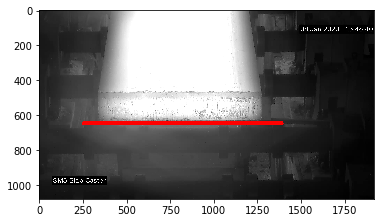

In [28]:
img = cv2.cvtColor(frame.copy(),cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img.copy()) 
hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)
yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
y,u,vb = cv2.split(yuv)


hls = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HLS)
h,l,ss = cv2.split(hls)

dst = cv2.addWeighted(y, 1.55, r, 1.21, 0.0)
dst = cv2.line(frame,(alar[0],alar[1]),(alar[2],alar[3]),255,23)
#dst = cv2.addWeighted(v, .02, r, 1.6, 0.0)

plt.imshow(dst)

In [29]:
510,1351,2784,1351

(510, 1351, 2784, 1351)

In [30]:
#%matplotlib notebook 

In [31]:
leftCor = []
rightCor = []
saveIt = []
while(True):
    ret, img = cap.read()
    
    img = cv2.resize(img,(img.shape[1]*2,img.shape[0]*2), cv2.INTER_AREA)
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img.copy()) 
    hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
    h,s,v = cv2.split(hsv)
    yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
    y,u,vb = cv2.split(yuv)
    
    #dst = cv2.addWeighted(y, .75, r, .601, 0.0)
    #dst = cv2.addWeighted(y, 1.55, r, 1.39, 0.0) #ori today 13-jan
    dst = cv2.addWeighted(y, 1.95, r, 2.01, 0.0)
    
    #canny = imutils.auto_canny(dst)

    
    #dst = cv2.addWeighted(v, .02, r, 1.251, 0.0)
    
    blur = cv2.GaussianBlur(dst,(3,3),0)
    #_,thresh = cv2.threshold(blur,145,255,cv2.THRESH_BINARY)  #ori today 13-jan
    
    _,thresh = cv2.threshold(blur,150,255,cv2.THRESH_BINARY)    
    
    #img = imutils.auto_canny(thresh)
    
    
    #_,thresh = cv2.threshold(blur,170,255,cv2.THRESH_BINARY) 
    #thresh = cv2.adaptiveThreshold(dst.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,501,-13)

    
    '''_ , contours, hierarchy =   cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(contours, key = cv2.contourArea,reverse= True)
    # cntr Order
    ordr = 0
    epsilon = 0.0001*cv2.arcLength(cnts[0],True)
    approx = cv2.approxPolyDP(cnts[0],epsilon,True)
    dstCnt = cv2.drawContours(img.copy(),[approx],ordr,(255),2)'''
    val = 816
    val = 1351
    
    #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
    if np.count_nonzero(thresh[val,]) >= 2000:
        leftSide = np.nonzero(thresh[val,])[0][0] 
        rightSide = np.nonzero(thresh[val,])[0][-1]
        leftCor.append(leftSide)
        rightCor.append(rightSide)
        #print(np.count_nonzero(thresh[816,]))
        mmPpix = ((1/pixelsPerMetric)* (rightSide - leftSide)) 
        print(mmPpix)
        print("leftSide = ",leftSide,"rightSide = ", rightSide)
        print(blur[val,][leftSide :rightSide ])
        
        img  = cv2.line(img ,(np.nonzero(thresh[val,])[0][0] ,alar[1]),((np.nonzero(thresh[val,])[0][-1]),alar[3]),(255),12)
        
        #img = cv2.line(img ,(alar[0],alar[1]),(alar[2],alar[3]),(255,5,0),3)
        
        img = cv2.circle(img,(leftSide,alar[1]) , 1, 0, 5)
        img = cv2.circle(img,(rightSide,alar[3]) , 1, 0, 5)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.putText(img,"{} mm".format(mmPpix),(0,330), font, 2, (200,255,155), 4, cv2.LINE_AA)

    
    img1 = cv2.resize(img ,(1920,1080))
    #img2 = cv2.resize(dstCnt,(500,300))
    img3 = cv2.resize(thresh,(500,300))
    cv2.imshow('img ',img1)
    saveIt.append(img1)
    #cv2.imshow('img ',img1)
    #cv2.imshow('img ',img3)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

4391.3150926743165
leftSide =  0 rightSide =  2944
[154 154 154 ... 154 154 153]
4391.3150926743165
leftSide =  0 rightSide =  2944
[154 154 154 ... 154 154 153]
4391.3150926743165
leftSide =  0 rightSide =  2944
[154 154 154 ... 154 154 153]
4391.3150926743165
leftSide =  0 rightSide =  2944
[154 154 154 ... 154 154 153]
4391.3150926743165
leftSide =  0 rightSide =  2944
[154 154 154 ... 154 154 153]
4391.3150926743165
leftSide =  0 rightSide =  2944
[154 154 154 ... 154 154 153]
4391.3150926743165
leftSide =  0 rightSide =  2944
[154 154 154 ... 154 154 153]
4391.3150926743165
leftSide =  0 rightSide =  2944
[154 154 154 ... 154 154 153]
4527.052074139453
leftSide =  0 rightSide =  3035
[154 154 154 ... 152 153 153]
4527.052074139453
leftSide =  0 rightSide =  3035
[154 154 154 ... 152 153 153]
4576.275375110326
leftSide =  0 rightSide =  3068
[154 154 154 ... 154 154 153]
4576.275375110326
leftSide =  0 rightSide =  3068
[154 154 154 ... 154 154 153]
4576.275375110326
leftSide =  0 

In [32]:
time.sleep(3)
for i in saveIt:
    cv2.imshow('img ',i)
    time.sleep(.05)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

In [ ]:
leftCor = np.array(leftCor)
rightCor = np.array(rightCor)

In [ ]:
leftCor.max()

In [ ]:
#%matplotlib notebook

In [ ]:
plt.imshow(dst)

In [ ]:
leftCor.min()

In [ ]:
plt.plot(leftCor,rightCor)

In [ ]:
data = np.vstack((leftCor,rightCor))

In [ ]:
data

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data.T)

In [ ]:
df

In [ ]:
df[0].unique()

In [ ]:
df[1].unique()

In [ ]:
df[0].max() - df[0].min()

In [ ]:
df[1].max() - df[1].min()